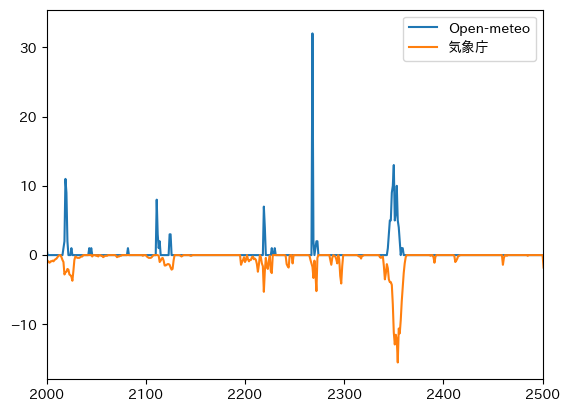

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

# ファイル名に"&"を使うのは事故のもと
filename = "大月open-meteo&気象庁.csv"

df = pd.read_csv(filename)
df.columns = ["time", "OM", "JMA"]

ticks = np.arange(len(df))
plt.plot(ticks, df["OM"], label="Open-meteo")
plt.plot(ticks + 9, -df["JMA"], label="気象庁")
plt.xlim(2000, 2500)
plt.legend()

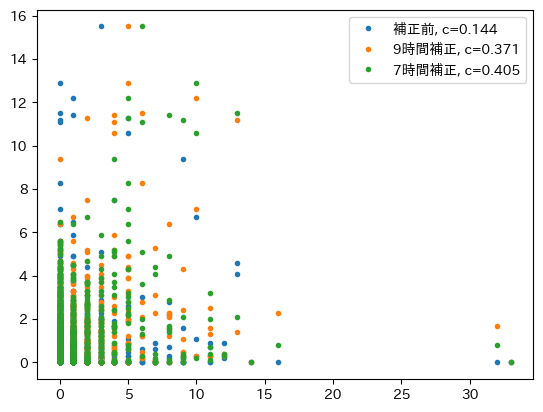

In [41]:
om = df["OM"]
jma = df["JMA"]

omjma = np.array([om, jma]).T
omjma = omjma[~np.isnan(om)]

c = np.corrcoef(omjma[:, 0], omjma[:, 1])
plt.plot(om, jma, ".", label=f"補正前, c={c[0,1]:.3f}")


om = df["OM"][9:]
jma = df["JMA"][:-9]

omjma = np.array([om, jma]).T
omjma = omjma[~np.isnan(om)]

c = np.corrcoef(omjma[:, 0], omjma[:, 1])
plt.plot(om, jma, ".", label=f"9時間補正, c={c[0,1]:.3f}")


om = df["OM"][7:]
jma = df["JMA"][:-7]

omjma = np.array([om, jma]).T
omjma = omjma[~np.isnan(om)]

c = np.corrcoef(omjma[:, 0], omjma[:, 1])
plt.plot(om, jma, ".", label=f"7時間補正, c={c[0,1]:.3f}")


plt.legend()

時間ずれを、相関から推定する。

-24 (8735,) (8735,)
-23 (8736,) (8736,)
-22 (8737,) (8737,)
-21 (8738,) (8738,)
-20 (8739,) (8739,)
-19 (8740,) (8740,)
-18 (8741,) (8741,)
-17 (8742,) (8742,)
-16 (8743,) (8743,)
-15 (8744,) (8744,)
-14 (8745,) (8745,)
-13 (8746,) (8746,)
-12 (8747,) (8747,)
-11 (8748,) (8748,)
-10 (8749,) (8749,)
-9 (8750,) (8750,)
-8 (8751,) (8751,)
-7 (8752,) (8752,)
-6 (8753,) (8753,)
-5 (8754,) (8754,)
-4 (8755,) (8755,)
-3 (8756,) (8756,)
-2 (8757,) (8757,)
-1 (8758,) (8758,)
0 (8759,) (8759,)
1 (8758,) (8758,)
2 (8757,) (8757,)
3 (8756,) (8756,)
4 (8755,) (8755,)
5 (8754,) (8754,)
6 (8753,) (8753,)
7 (8752,) (8752,)
8 (8751,) (8751,)
9 (8750,) (8750,)
10 (8749,) (8749,)
11 (8748,) (8748,)
12 (8747,) (8747,)
13 (8746,) (8746,)
14 (8745,) (8745,)
15 (8744,) (8744,)
16 (8743,) (8743,)
17 (8742,) (8742,)
18 (8741,) (8741,)
19 (8740,) (8740,)
20 (8739,) (8739,)
21 (8738,) (8738,)
22 (8737,) (8737,)
23 (8736,) (8736,)
{-24: np.float64(0.048917897629680525), -23: np.float64(0.0501144950767117), -22: n

(-24.0, 24.0)

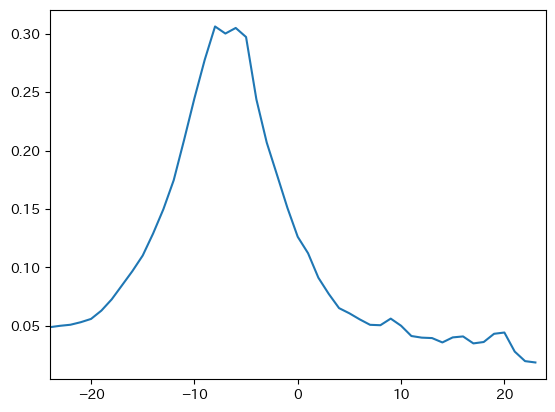

In [40]:
corr = dict()
for dt in range(-24, 24):
    if dt < 0:
        om = df["OM"][-dt:]
        jma = df["JMA"][:dt]
    elif dt > 0:
        om = df["OM"][:-dt]
        jma = df["JMA"][dt:]
    else:
        om = df["OM"]
        jma = df["JMA"]

    print(dt, om.shape, jma.shape)
    om1 = om.to_numpy()[~np.isnan(om)]
    jma1 = jma.to_numpy()[~np.isnan(om)]
    corr[dt] = np.mean(om1 * jma1)

print(corr)
plt.plot([x for x in range(-24, 24)], [corr[x] for x in range(-24, 24)])
plt.xlim(-24, 24)